In [19]:
import pandas as pd
import os
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [20]:
ENRICHED_WKLY_FILE_NAME = os.path.join('data', 'clean', 'regional-us-weekly-enriched.csv')
ENRICHED_WORST_FILE_NAME = os.path.join('data', 'clean', '2018-worst-songs-enriched.csv')
ENRICHED_FORGOTIFY_FILE_NAME = os.path.join('data', 'clean', 'forgotify-10-enriched.csv')

# Load Enriched Spotify Weekly Data

In [21]:
wkly_data_df = pd.read_csv(ENRICHED_WKLY_FILE_NAME)
wkly_data_df.head()

,Position,Track Name,Artist,Streams,URL,Week Start Date,Week End Date,Acousticness,Album,Danceability,...,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,1,rockstar,Post Malone,10134471,https://open.spotify.com/track/7wGoVu4Dady5GV0...,2017-12-29,2018-01-05,0.130000,rockstar,0.577,...,0.000090,5,0.1420,-6.594,0,28,0.0984,159.772,4,0.1190
1,2,No Limit,G-Eazy,7090891,https://open.spotify.com/track/2DQ1ITjI0YoLFzu...,2017-12-29,2018-01-05,0.011700,The Beautiful & Damned,0.838,...,0.000000,1,0.0853,-3.791,1,72,0.2440,175.957,4,0.4050
2,3,I Fall Apart,Post Malone,6673907,https://open.spotify.com/track/75ZvA4QfFiZvzhj...,2017-12-29,2018-01-05,0.068900,Stoney (Deluxe),0.556,...,0.000000,8,0.1960,-5.408,0,87,0.0382,143.950,4,0.2910
3,4,Bartier Cardi (feat. 21 Savage),Cardi B,6624198,https://open.spotify.com/track/75FDPwaULRdYDn4...,2017-12-29,2018-01-05,0.000704,Bartier Cardi (feat. 21 Savage),0.909,...,0.000823,8,0.3600,-7.513,1,66,0.1750,138.043,4,0.0986
4,5,Gucci Gang,Lil Pump,5975507,https://open.spotify.com/track/43ZyHQITOjhciSU...,2017-12-29,2018-01-05,0.239000,Lil Pump,0.936,...,0.000000,5,0.1170,-6.710,1,78,0.0597,119.889,4,0.6990


## Compute Top 10 Tracks for 2018

In [22]:
track_and_features_df = wkly_data_df.drop(['Position', 'URL', 'Week Start Date', 'Week End Date', 'Album'], axis=1)
agg_by_track_df = track_and_features_df.groupby(['Track Name', 'Artist']).agg({
    'Streams':'sum', 'Acousticness':'max', 'Danceability':'max', 'Key':'min', 'Liveness':'max', 'Loudness':'max',
    'Popularity':'max', 'Speechiness':'max', 'Tempo':'max', 'Time Signature':'max', 'Valence':'max', 'Energy':'max', 'Instrumentalness':'max', 'Mode':'max'}) 
sorted_by_total_streams_df = agg_by_track_df.sort_values(by="Streams", ascending=False).reset_index()
top_10_df = sorted_by_total_streams_df.head(n=10)
top_10_df['Label'] = top_10_df['Track Name'] + ' (' + top_10_df['Artist'] + ")"
top_10_df

,Track Name,Artist,Streams,Acousticness,Danceability,Key,Liveness,Loudness,Popularity,Speechiness,Tempo,Time Signature,Valence,Energy,Instrumentalness,Mode,Label
0,God's Plan,Drake,460070262,0.03320,0.758,7,0.558,-9.211,90,0.1090,77.179,4,0.373,0.449,0.000087,1,God's Plan (Drake)
1,SAD!,XXXTENTACION,340496175,0.25800,0.740,8,0.123,-4.880,92,0.1450,75.023,4,0.473,0.613,0.003720,1,SAD! (XXXTENTACION)
2,Psycho (feat. Ty Dolla $ign),Post Malone,310156476,0.59000,0.748,8,0.112,-8.011,88,0.1170,140.124,4,0.439,0.559,0.000000,1,Psycho (feat. Ty Dolla $ign) (Post Malone)
3,Lucid Dreams,Juice WRLD,303942353,0.37700,0.511,6,0.340,-7.230,89,0.2370,83.903,4,0.218,0.566,0.000000,0,Lucid Dreams (Juice WRLD)
4,Look Alive (feat. Drake),BlocBoy JB,268178220,0.00104,0.922,10,0.105,-7.495,86,0.2700,140.022,4,0.595,0.581,0.000059,1,Look Alive (feat. Drake) (BlocBoy JB)
5,Nice For What,Drake,267229876,0.09340,0.700,8,0.119,-6.461,86,0.0736,93.469,4,0.792,0.913,0.000124,1,Nice For What (Drake)
6,Better Now,Post Malone,254685346,0.35400,0.680,10,0.136,-5.843,92,0.0454,145.028,4,0.374,0.563,0.000000,1,Better Now (Post Malone)
7,Moonlight,XXXTENTACION,249897971,0.55600,0.921,9,0.102,-5.723,91,0.0804,128.009,4,0.711,0.537,0.004040,0,Moonlight (XXXTENTACION)
8,In My Feelings,Drake,247009164,0.05890,0.835,1,0.448,-5.833,90,0.1390,181.995,4,0.350,0.626,0.014400,1,In My Feelings (Drake)
9,I Like It,Cardi B,239838666,0.09900,0.816,5,0.372,-3.998,90,0.1290,136.048,4,0.650,0.726,0.000000,0,I Like It (Cardi B)


# Load Enriched Forgotify Data

In [23]:
forgotify_data_df = pd.read_csv(ENRICHED_FORGOTIFY_FILE_NAME)
forgotify_data_df = forgotify_data_df.drop(['Position', 'Album', 'Duration (ms)', 'Explicit', 'Image', 'URL'], axis=1)
forgotify_data_df = forgotify_data_df.rename(columns={'Title':'Track Name'})
forgotify_data_df['Label'] = forgotify_data_df['Track Name'] + ' (' + forgotify_data_df['Artist'] + ")"
forgotify_data_df.head()


,Artist,Track Name,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence,Label
0,Alex Kiskachi,On Land and Sea,0.740,0.747,0.2060,0.000000,4,0.1180,-17.181,0,0,0.0528,126.951,4,0.436,On Land and Sea (Alex Kiskachi)
1,Ragged Jack,What We've Got Coming,0.133,0.568,0.4430,0.000014,0,0.0764,-10.865,1,0,0.0295,140.074,4,0.141,What We've Got Coming (Ragged Jack)
2,Kidzone,Dem Bones,0.163,0.820,0.3820,0.168000,2,0.0770,-11.985,1,0,0.1410,161.597,4,0.853,Dem Bones (Kidzone)
3,Armen Firman,Dressed For War,0.228,0.488,0.5700,0.000000,0,0.0896,-5.702,0,0,0.0328,164.031,4,0.226,Dressed For War (Armen Firman)
4,Dave Hancock,It Might As Well Be Spring,0.962,0.402,0.0367,0.897000,7,0.0776,-16.049,1,0,0.0597,75.414,3,0.229,It Might As Well Be Spring (Dave Hancock)


# Load Enriched Time Worst 10 Songs

In [24]:
worst_song_data_df = pd.read_csv(ENRICHED_WORST_FILE_NAME)
worst_song_data_df = worst_song_data_df.drop(['Position', 'Album', 'Duration (ms)', 'Explicit', 'Image', 'URL'], axis=1)
worst_song_data_df = worst_song_data_df.rename(columns={'Title':'Track Name'})
worst_song_data_df['Label'] = worst_song_data_df['Track Name'] + ' (' + worst_song_data_df['Artist'] + ")"
worst_song_data_df

,Artist,Track Name,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence,Label
0,Post Malone,Psycho (feat. Ty Dolla $ign),0.58000,0.739,0.559,0.000000,8,0.1120,-8.011,1,88,0.1170,140.124,4,0.439,Psycho (feat. Ty Dolla $ign) (Post Malone)
1,6ix9ine,FEFE (feat. Nicki Minaj & Murda Beatz),0.09080,0.930,0.386,0.000000,1,0.1410,-9.130,1,42,0.4040,125.998,4,0.383,FEFE (feat. Nicki Minaj & Murda Beatz) (6ix9ine)
2,Bella Thorne,B*TCH I’M BELLA THORNE,0.25300,0.639,0.754,0.000000,8,0.0904,-4.137,1,46,0.1790,145.036,4,0.743,B*TCH I’M BELLA THORNE (Bella Thorne)
3,Justin Timberlake,The Hard Stuff,0.15200,0.501,0.839,0.000322,11,0.3670,-7.472,1,50,0.0432,167.853,4,0.489,The Hard Stuff (Justin Timberlake)
4,Maroon 5,Girls Like You (feat. Cardi B),0.56800,0.851,0.541,0.000000,0,0.1300,-6.825,1,89,0.0505,124.959,4,0.448,Girls Like You (feat. Cardi B) (Maroon 5)
5,Zayn,Let Me,0.23900,0.460,0.566,0.000006,9,0.0967,-5.637,1,65,0.0516,168.419,4,0.190,Let Me (Zayn)
6,DJ Snake,"Taki Taki (with Selena Gomez,Ozuna & Cardi B)",0.15300,0.841,0.798,0.000003,1,0.0618,-4.206,0,97,0.2290,95.948,4,0.591,"Taki Taki (with Selena Gomez,Ozuna & Cardi B) ..."
7,Kanye West and Lil Pump,I Love It,0.01140,0.901,0.522,0.000000,2,0.2590,-8.304,1,88,0.3300,104.053,4,0.329,I Love It (Kanye West and Lil Pump)
8,Greta Van Fleet,"Lover,Leaver",0.00206,0.493,0.924,0.147000,9,0.1360,-3.875,1,65,0.0511,91.944,4,0.580,"Lover,Leaver (Greta Van Fleet)"
9,Eminem,Fall,0.22700,0.830,0.546,0.000000,1,0.1120,-5.716,1,79,0.2950,182.973,4,0.535,Fall (Eminem)


# Compare Energy

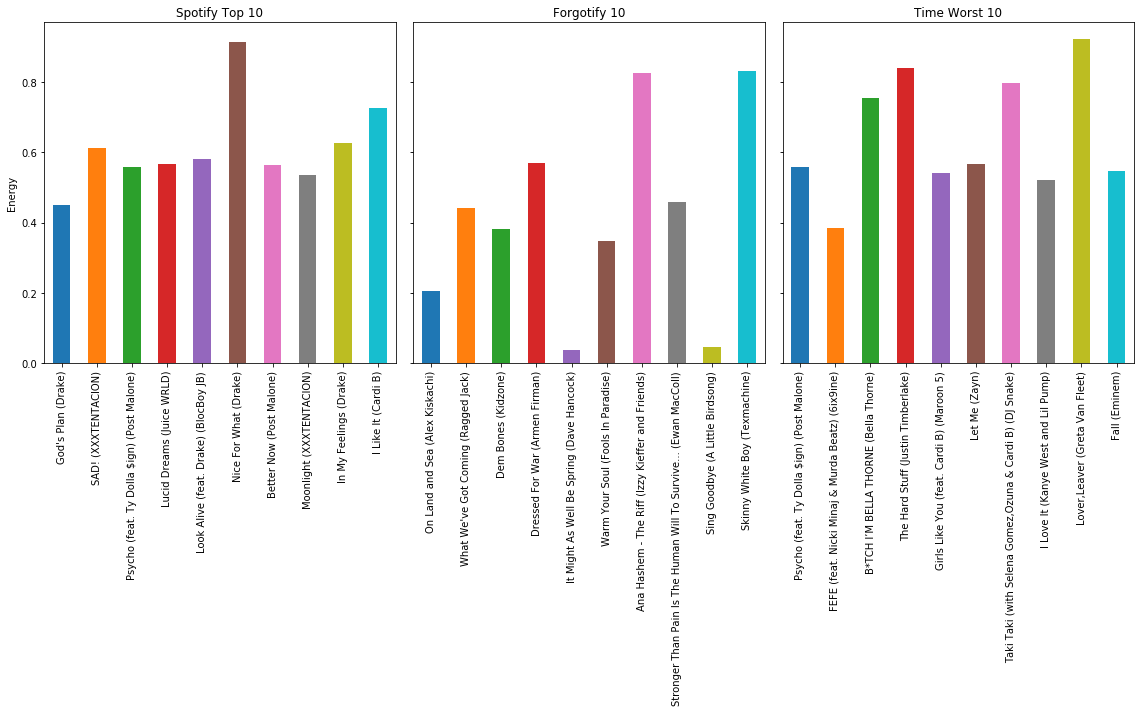

In [25]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Energy', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Energy")

forgotify_data_df.plot(kind='bar', x='Label', y='Energy', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Energy', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Danceability

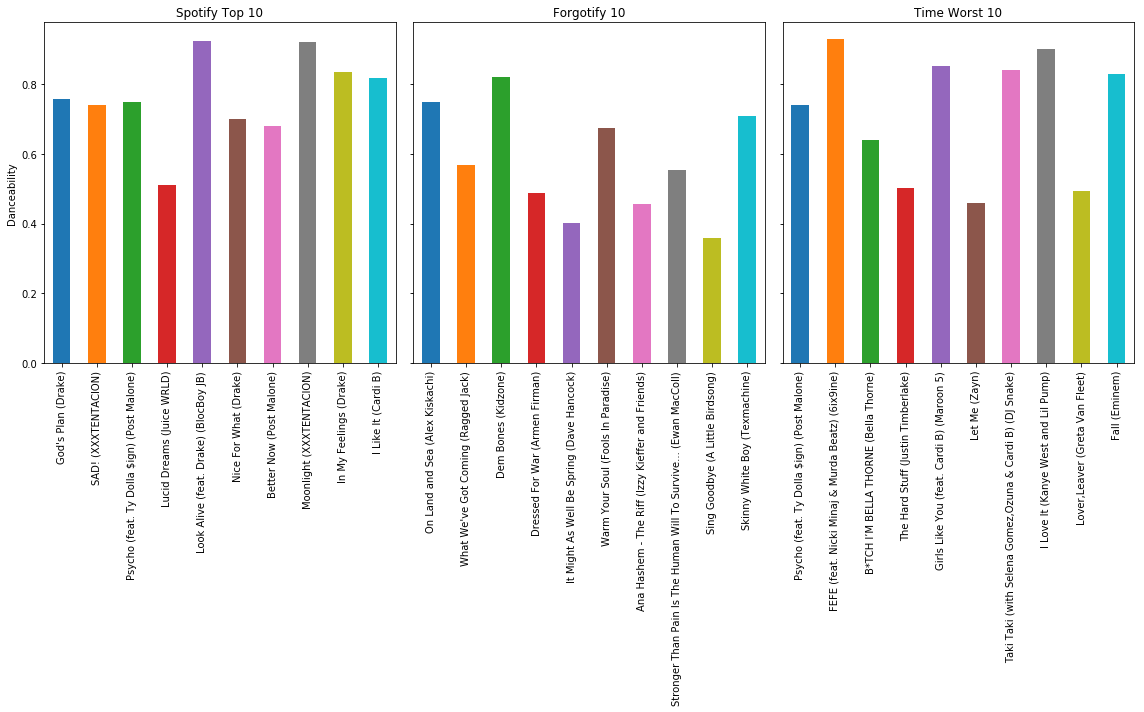

In [26]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Danceability', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Danceability")

forgotify_data_df.plot(kind='bar', x='Label', y='Danceability', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Danceability', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Tempo

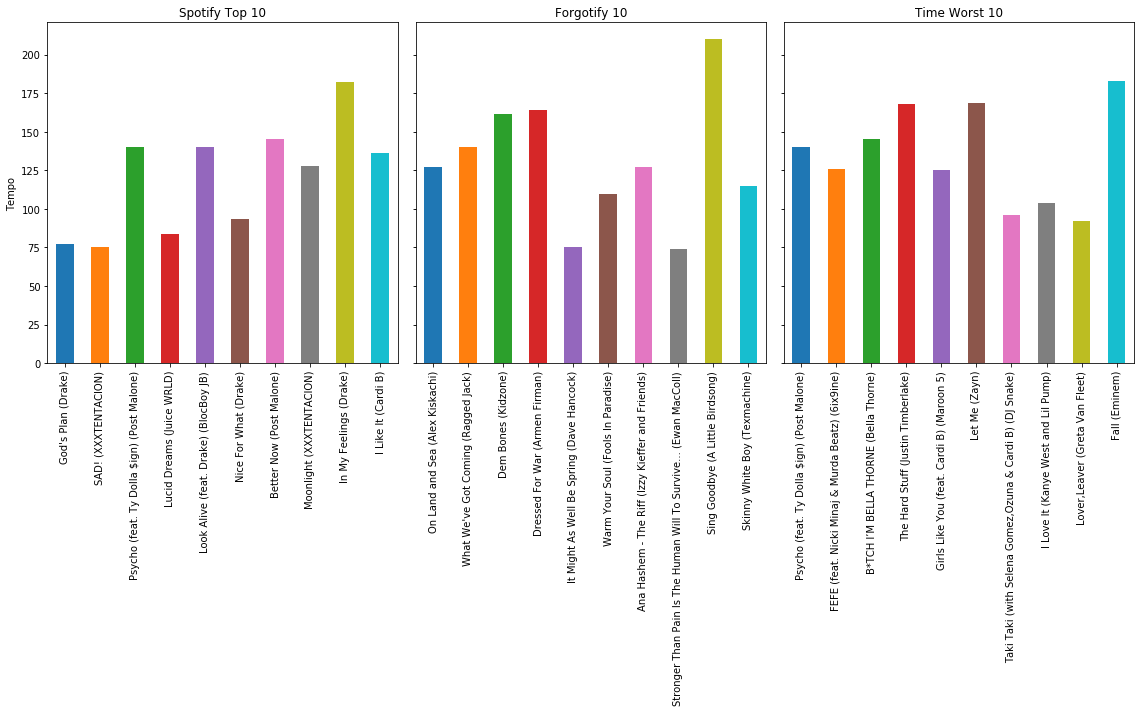

In [27]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Tempo', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Tempo")

forgotify_data_df.plot(kind='bar', x='Label', y='Tempo', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Tempo', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Loudness

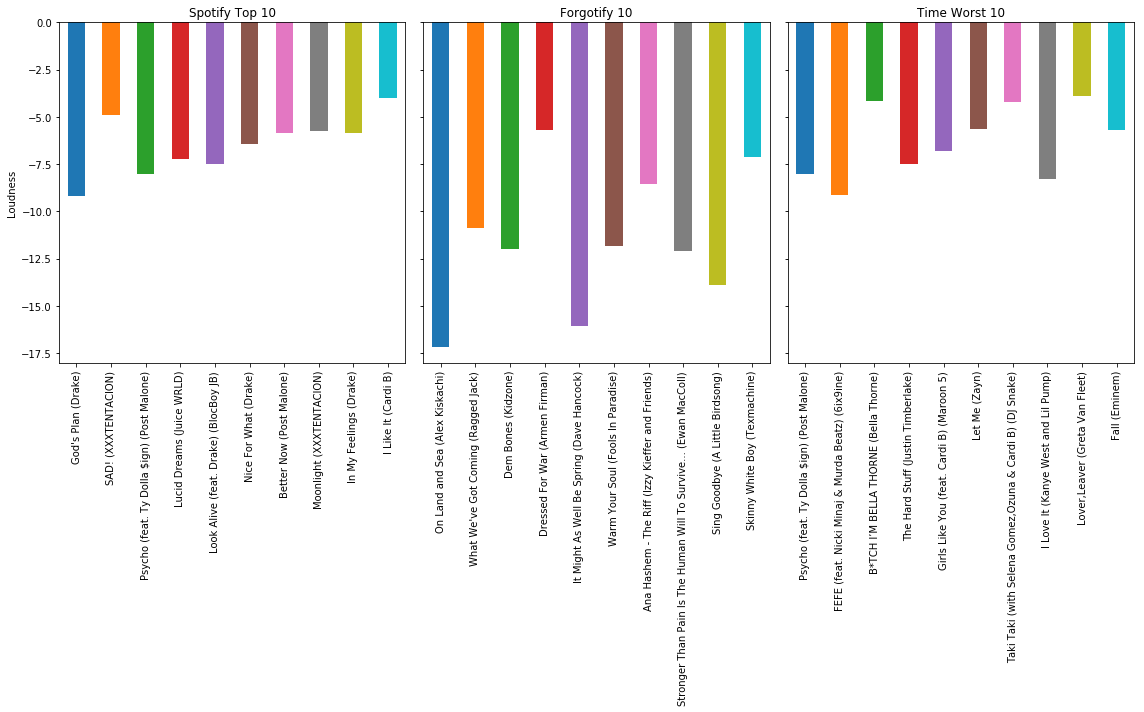

In [28]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Loudness', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Loudness")

forgotify_data_df.plot(kind='bar', x='Label', y='Loudness', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Loudness', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Liveness

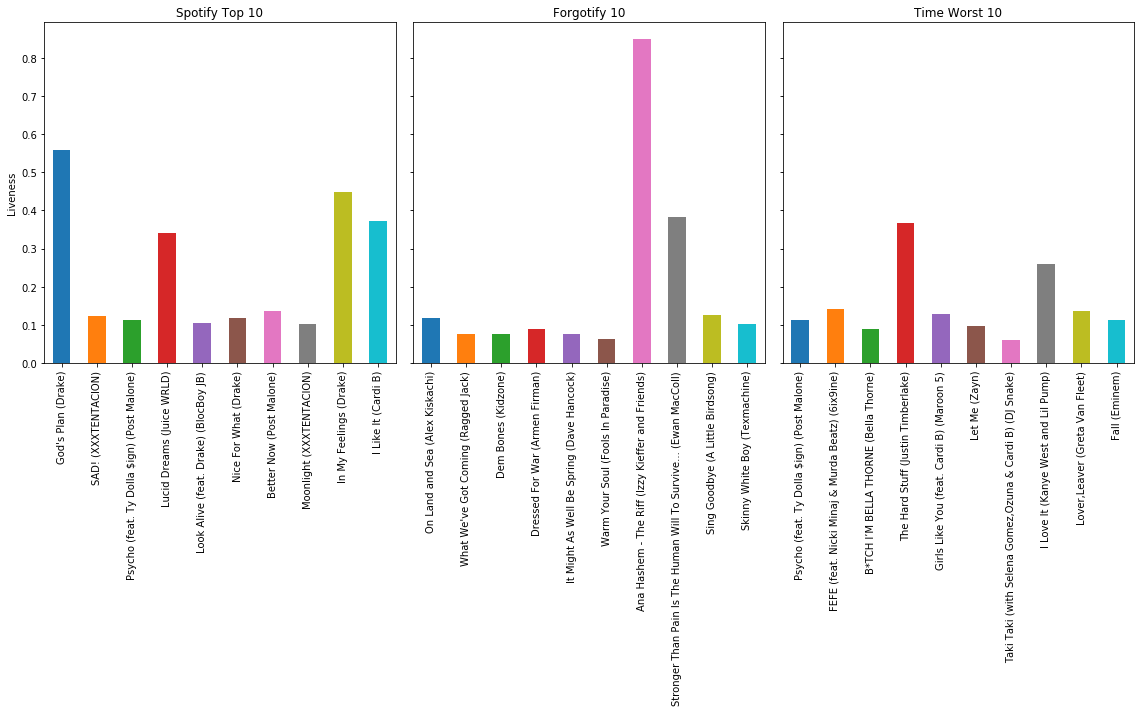

In [29]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Liveness', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Liveness")

forgotify_data_df.plot(kind='bar', x='Label', y='Liveness', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Liveness', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Acousticness

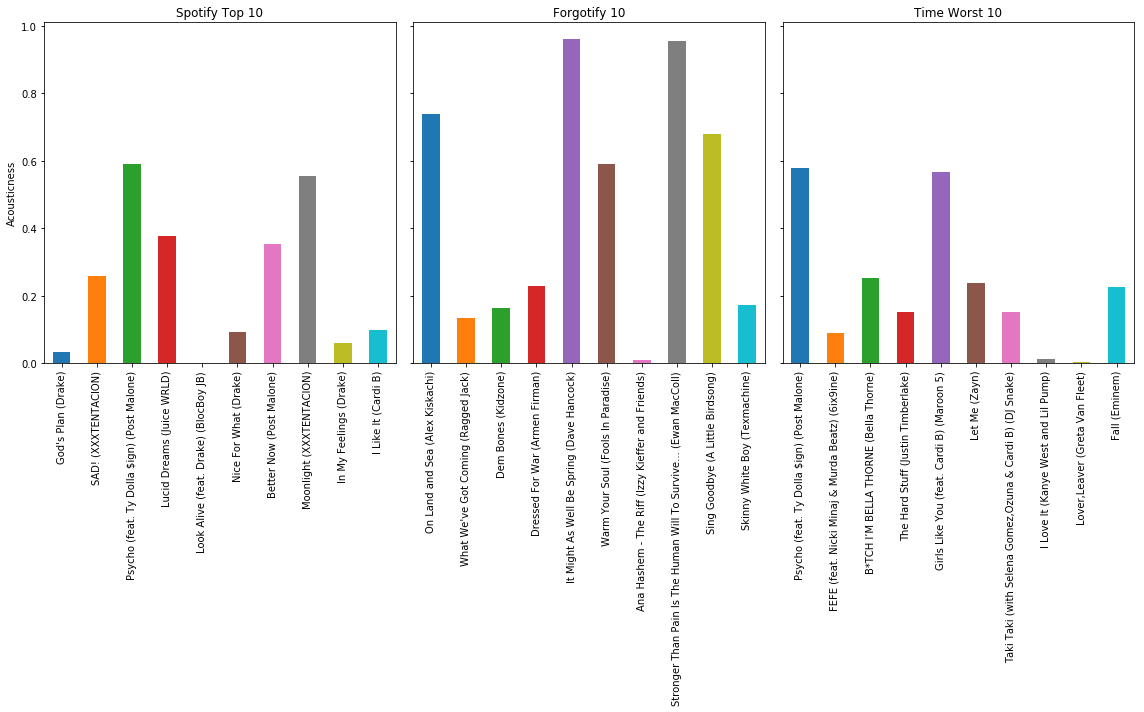

In [30]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Acousticness', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Acousticness")

forgotify_data_df.plot(kind='bar', x='Label', y='Acousticness', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Acousticness', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Instrumentalness

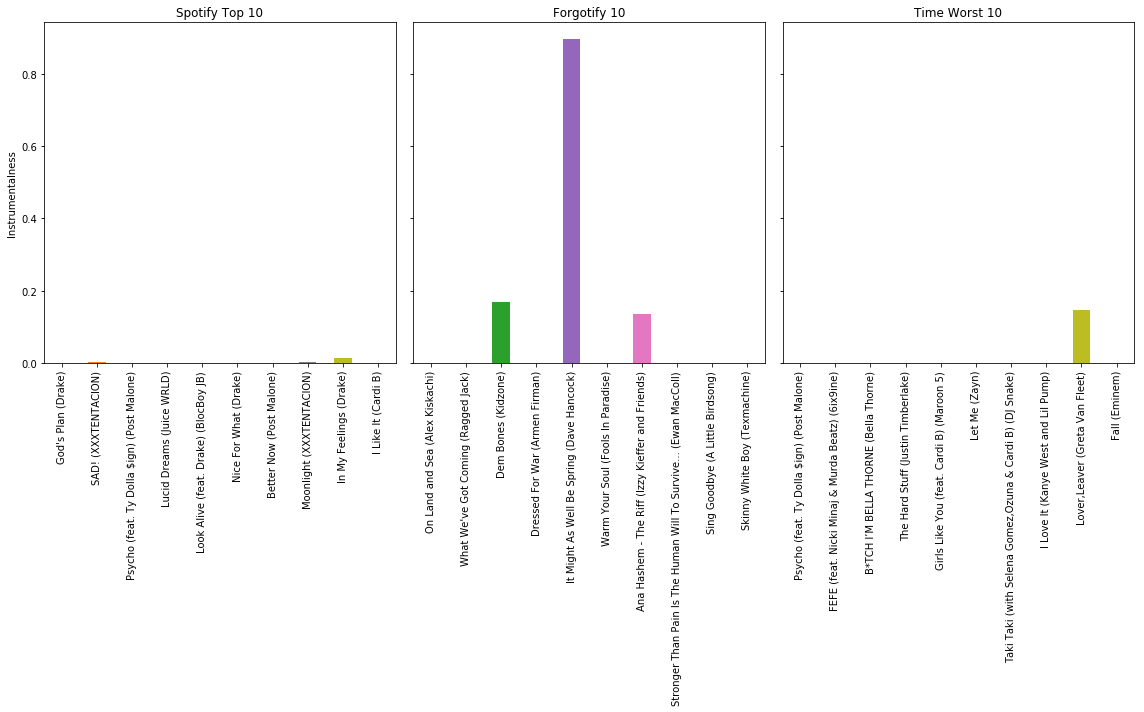

In [31]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Instrumentalness', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Instrumentalness")

forgotify_data_df.plot(kind='bar', x='Label', y='Instrumentalness', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Instrumentalness', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Valence

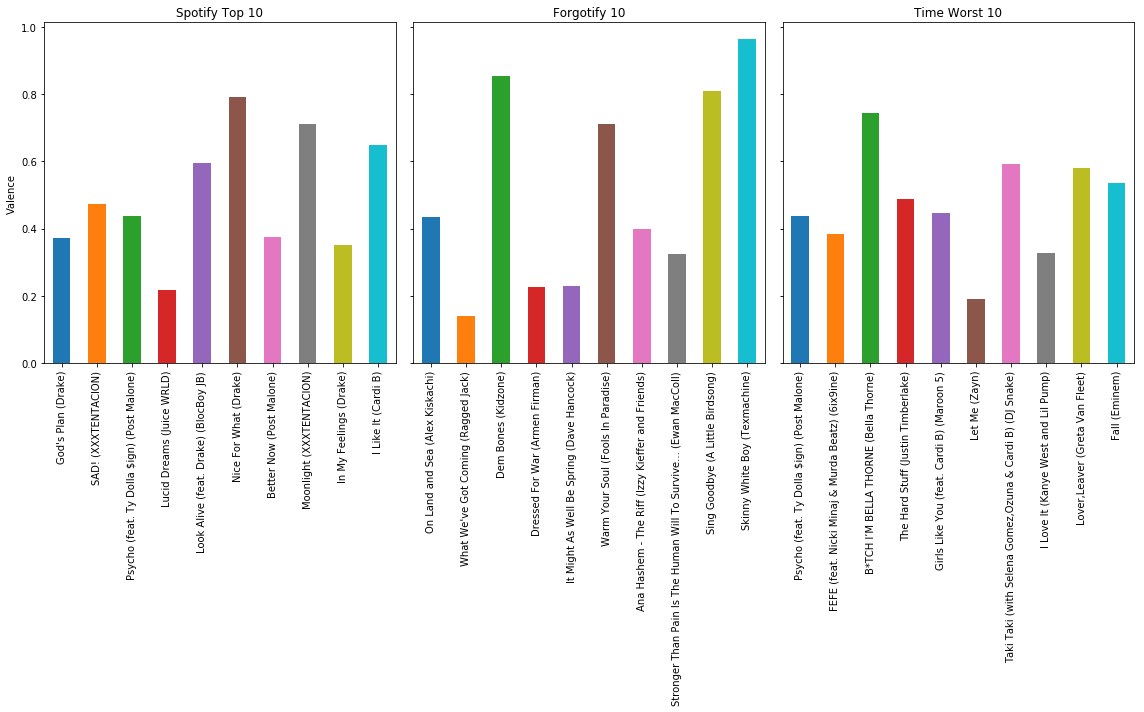

In [32]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Valence', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Valence")

forgotify_data_df.plot(kind='bar', x='Label', y='Valence', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Valence', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compare Speechiness

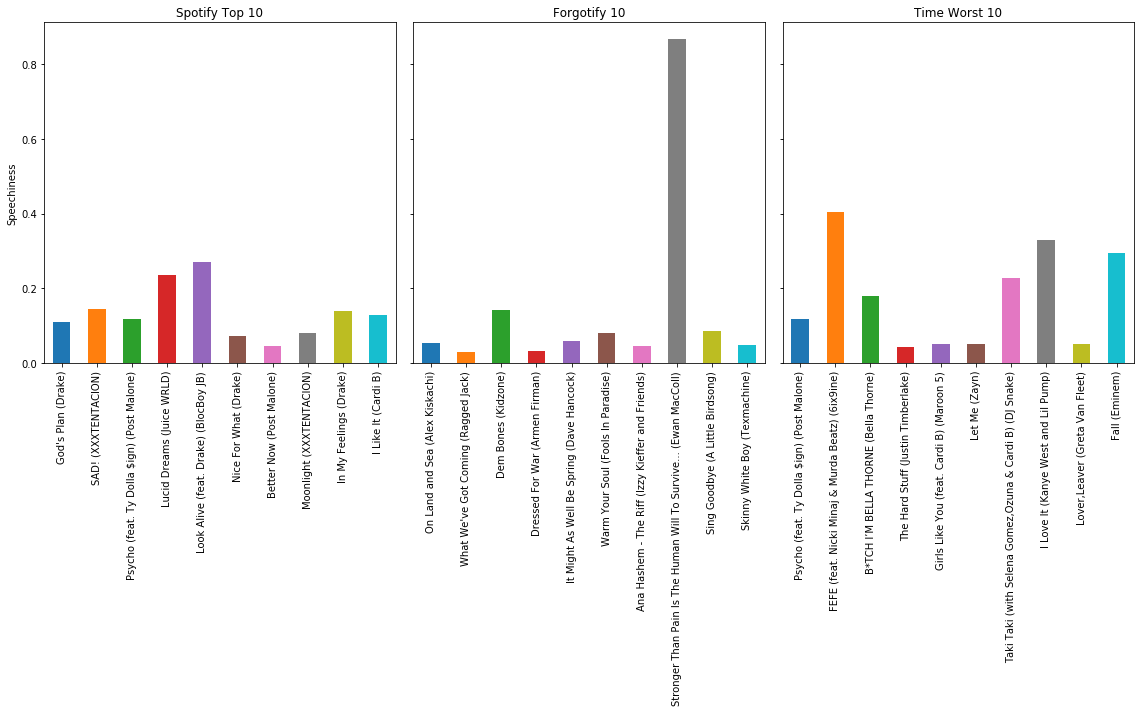

In [33]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(16,10))

top_10_df.plot(kind='bar', x='Label', y='Speechiness', legend=False, ax=ax1)
ax1.set_title("Spotify Top 10")
ax1.set_xlabel("")
ax1.set_ylabel("Speechiness")

forgotify_data_df.plot(kind='bar', x='Label', y='Speechiness', legend=False, ax=ax2)
ax2.set_title("Forgotify 10")
ax2.set_xlabel("")

worst_song_data_df.plot(kind='bar', x='Label', y='Speechiness', legend=False, ax=ax3)
ax3.set_title("Time Worst 10")
ax3.set_xlabel("")
plt.tight_layout()

# Compute Feature Averages

In [34]:
top_10_means = top_10_df.drop(['Track Name', 'Artist', 'Streams', 'Popularity', 'Label'], axis=1).mean()
forgotify_means = forgotify_data_df.drop(['Track Name', 'Artist', 'Popularity', 'Label'], axis=1).mean()
worst_song_means = worst_song_data_df.drop(['Track Name', 'Artist', 'Popularity', 'Label'], axis=1).mean()

In [35]:
average_df = pd.DataFrame({'Top 10': top_10_means, 'Forgotify': forgotify_means, 'Time Worst Songs':worst_song_means})
average_df = average_df.reset_index()
average_df

,index,Top 10,Forgotify,Time Worst Songs
0,Acousticness,0.242054,0.463320,0.227626
1,Danceability,0.763100,0.577700,0.718500
2,Energy,0.613300,0.415220,0.643500
3,Instrumentalness,0.002243,0.120212,0.014733
4,Key,7.200000,3.800000,5.000000
5,Liveness,0.241500,0.196180,0.150590
6,Loudness,-6.468500,-11.529200,-6.331300
7,Mode,0.700000,0.600000,0.900000
8,Speechiness,0.134540,0.144490,0.175040
9,Tempo,120.080000,130.431600,134.730700


# Compare Feature Averages

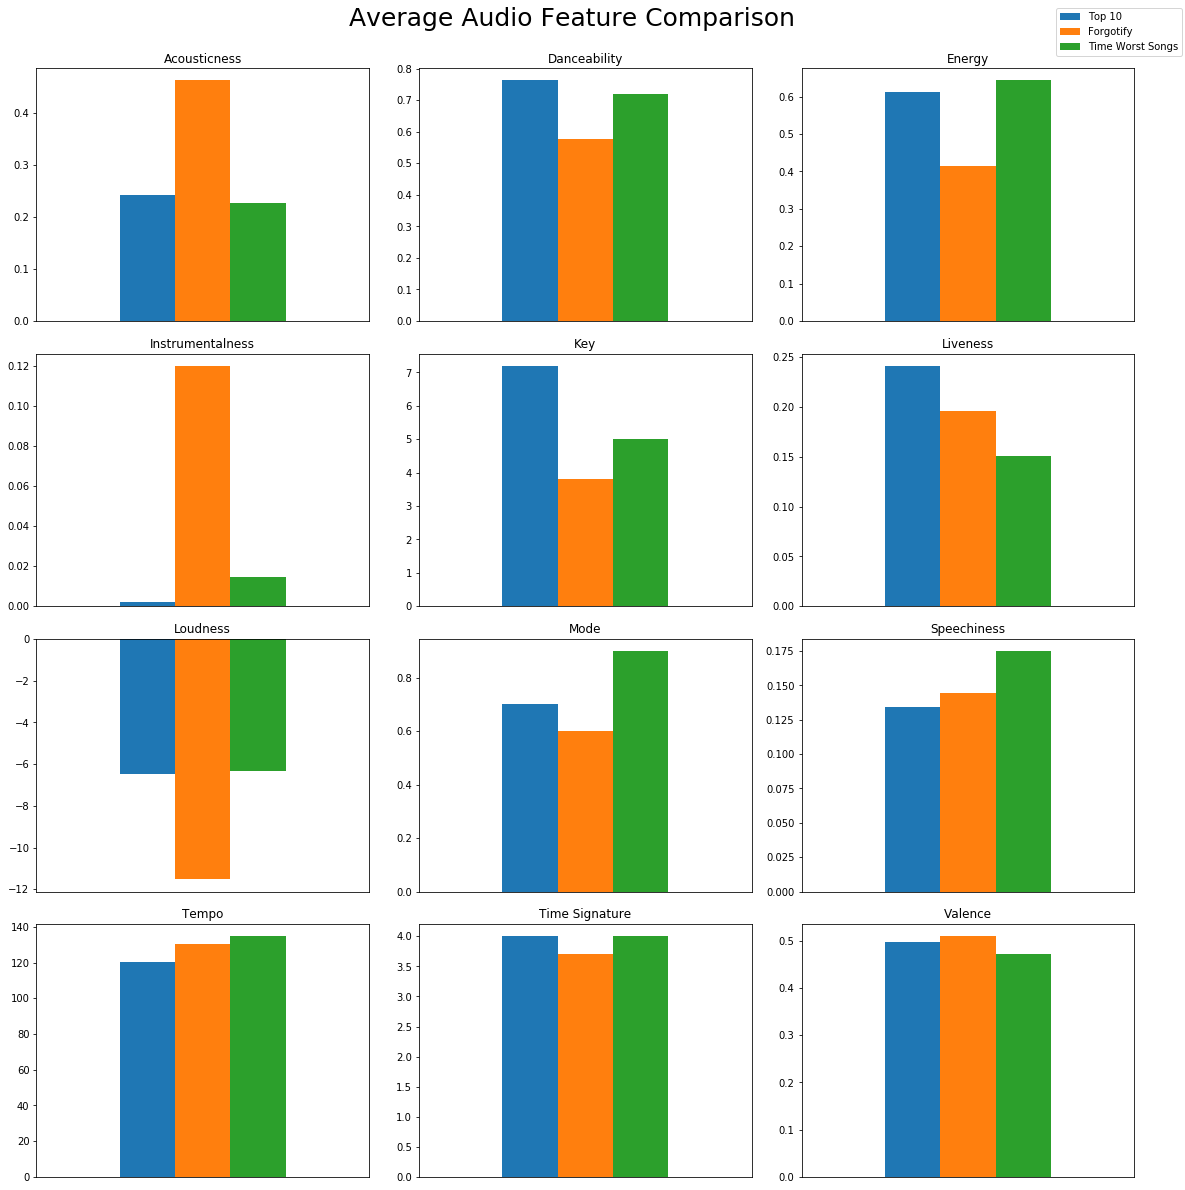

In [36]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12)) = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

average_df[average_df['index']=='Acousticness'].plot(kind='bar', title='Acousticness', ax=ax1, legend=False)
average_df[average_df['index']=='Danceability'].plot(kind='bar', title='Danceability', ax=ax2, legend=False)
average_df[average_df['index']=='Energy'].plot(kind='bar', title='Energy', ax=ax3, legend=False)
average_df[average_df['index']=='Instrumentalness'].plot(kind='bar', title='Instrumentalness', ax=ax4, legend=False)
average_df[average_df['index']=='Key'].plot(kind='bar', title='Key', ax=ax5, legend=False)
average_df[average_df['index']=='Liveness'].plot(kind='bar', title='Liveness', ax=ax6, legend=False)
average_df[average_df['index']=='Loudness'].plot(kind='bar', title='Loudness', ax=ax7, legend=False)
average_df[average_df['index']=='Mode'].plot(kind='bar', title='Mode', ax=ax8, legend=False)
average_df[average_df['index']=='Speechiness'].plot(kind='bar', title='Speechiness', ax=ax9, legend=False)
average_df[average_df['index']=='Tempo'].plot(kind='bar', title='Tempo', ax=ax10, legend=False)
average_df[average_df['index']=='Time Signature'].plot(kind='bar', title='Time Signature', ax=ax11, legend=False)
average_df[average_df['index']=='Valence'].plot(kind='bar', title='Valence', ax=ax12, legend=False)

for ax in fig.get_axes():
    ax.set_xticks([])

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  ncol=1, bbox_to_anchor=(1, 1), borderaxespad=-3)
fig.suptitle('Average Audio Feature Comparison', fontsize=25, y=1.03)

plt.tight_layout()

### Compare Most Commonly Used Keys and Modes 
- Keys - 0:'C', 1:'C♯,D♭', 2:'D', 3:'D♯,E♭', 4:'E', 5:'F', 6:'F♯,G♭', 7:'G', 8:'G♯,A♭', 9:'A', 10:'A♯,B♭', 11:'B'
- Modes - 0:'Minor', 1:'Major'

In [65]:
top_10_mode_mode = top_10_df['Mode'].mode().item()
top_10_key_mode = top_10_df['Key'].mode().item()
worst_mode_mode = worst_song_data_df['Mode'].mode().item()
worst_key_mode = worst_song_data_df['Key'].mode().item()
forgotify_mode_mode = forgotify_data_df['Mode'].mode().item()
forgotify_key_mode = forgotify_data_df['Key'].mode().item()
mode_df = pd.DataFrame({"Category":['Top 10', 'Forgotify', 'Time Worst Songs'],
                        "Mode":[top_10_mode_mode, forgotify_mode_mode, worst_mode_mode],
                        "Key":[top_10_key_mode, forgotify_key_mode, worst_key_mode]})
mode_df = mode_df.set_index('Category')
mode_df = mode_df.T.reset_index()
mode_df

Category,index,Top 10,Forgotify,Time Worst Songs
0,Mode,1,1,1
1,Key,8,0,1


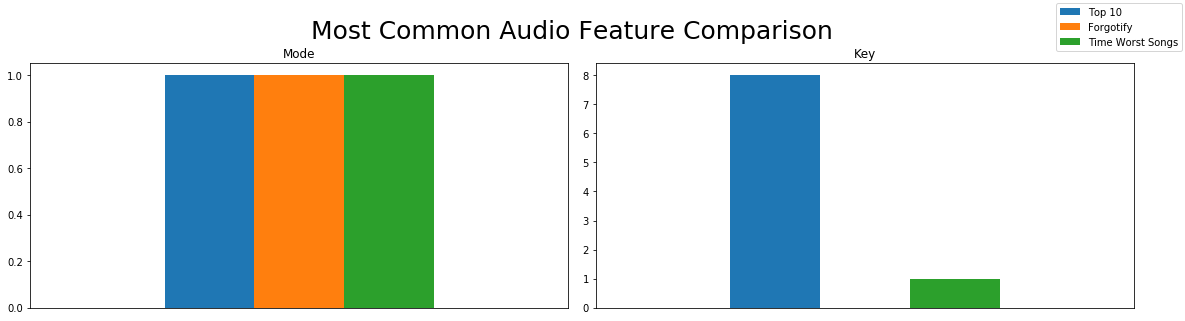

In [70]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,4))

mode_df[mode_df['index']=='Mode'].plot(kind='bar', title='Mode', ax=ax1, legend=False)
mode_df[mode_df['index']=='Key'].plot(kind='bar', title='Key', ax=ax2, legend=False)

for ax in fig.get_axes():
    ax.set_xticks([])

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels,  ncol=1, bbox_to_anchor=(1, 1), borderaxespad=-3)
fig.suptitle('Most Common Audio Feature Comparison', fontsize=25, y=1.06)

plt.tight_layout()